PHYS 3700 Worksheet 3

1.Moving Average Filter.

(a) Produce a square wave with 500 sample points. Set sample points 200-299 to 1 and all others to 0.

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import signal

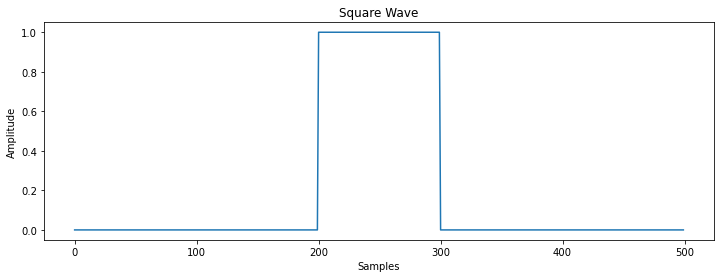

In [48]:
sample = np.arange(500)
sq_wave = np.zeros(500)

i = 200
while (i <= 299 ):
    sq_wave[i]=1
    i += 1
    
plt.figure(figsize=(12,4))
plt.plot(sample,sq_wave)
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.title("Square Wave")
plt.show()

(b) Add uniform noise to the wave (-0.6 to 0.6) and plot your noisy square wave along with its FFT (don’t wory about the horizontal scale)

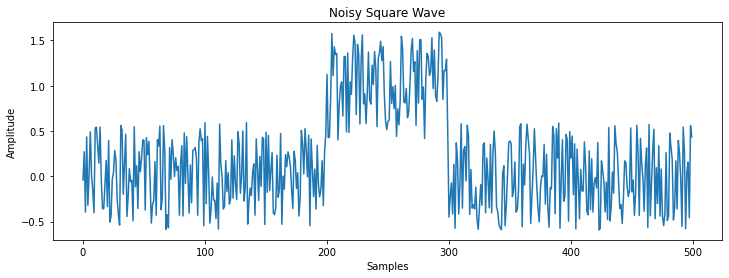

In [53]:
noise = np.random.uniform(-.6,.6,500)
sq_wave_noisy = sq_wave + noise

plt.figure(figsize=(12,4))
plt.plot(sample,sq_wave_noisy)
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.title("Noisy Square Wave")
plt.show()

(c) Filter your wave by calculating an 11 point average. For now, you can deal with the edge effects however you like, but your new filtered wave should have values something like
    
        y[1] = 1/11(x[1]+x[2]+... ...+x[11])
        y[2] = 1/11(x[2]+x[3]+... ...+x[12])
    
where y[n] is your filtered output and x[n] is your input.

In [54]:
def eleven_point_ave(wave):
    i = 0
    filtered_wave = []
    
    # loop to add the 11 point averages to a list
    while (i < (len(wave)-11)):        # loop ends before 11 before the end of the data set to account for nothing beyond the end    
        j = 0
        sum_1= 0
        # loop to add 11 sequential data points
        while (j < 11):
            sum_1 = sum_1 + wave[i + j]    # summing 11 sequential points as it moves one point over
            j += 1                     
        filtered_wave.append(sum_1/11)   # divide the sum by 11 and save to a list
        i+= 1 
         
    return filtered_wave

sq_wave_noisy_fltrd = eleven_point_ave(sq_wave_noisy)  # take 11 point average of the noisy sqare wave

(d) Plot your filtered wave along with its FFT (again, don’t worry about the horizontal scale).

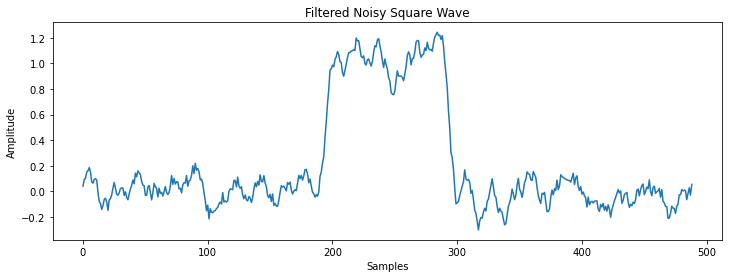

In [55]:
plt.figure(figsize=(12,4))
plt.plot(range(len(sq_wave_noisy_fltrd)),sq_wave_noisy_fltrd)
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.title("Filtered Noisy Square Wave")
plt.show()

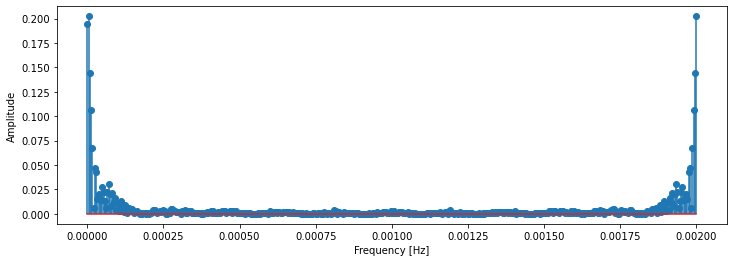

In [33]:
fft_sq_wave = np.fft.fft(sq_wave_noisy_fltrd)        # Fourier transform of the sample and hold v
N_1 = len(sq_wave_noisy_fltrd)              
f_1 = np.linspace(0, 1 / 500, N_1)
plt.figure(figsize=(12,4))
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.stem(f_1,np.abs(fft_sq_wave)/N_1)
plt.show()

2.Plotting Impulse and Step Functions. 

(a) Plot x[n] = 5δ[n] − 3δ[n − 1]

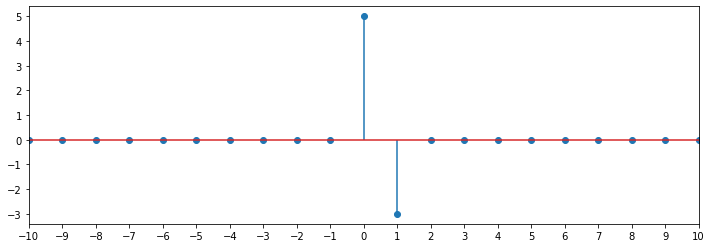

In [4]:
def impulse(x):
    return 1*(x==0)

def impulse_func(x):
    value =  5*impulse(x)-3*impulse(x-1)
    return value

ts = np.arange(-10,11)
impulse_signal = ([impulse_func(n) for n in ts])

plt.figure(figsize=(12,4))
plt.xlim(-10,10)
plt.stem(ts,impulse_signal)
plt.xticks(ts)
plt.show()

(b) Plot (a) x[n] = e<sup>−2n</sup>u[n] and (b) x[n − 2]

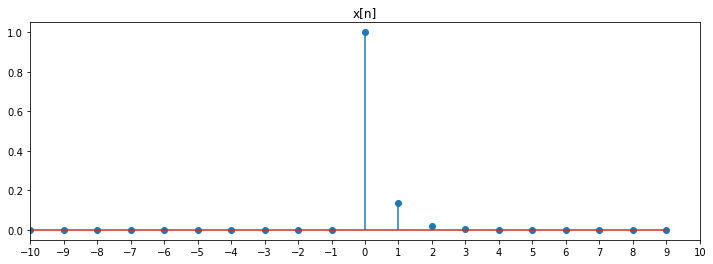

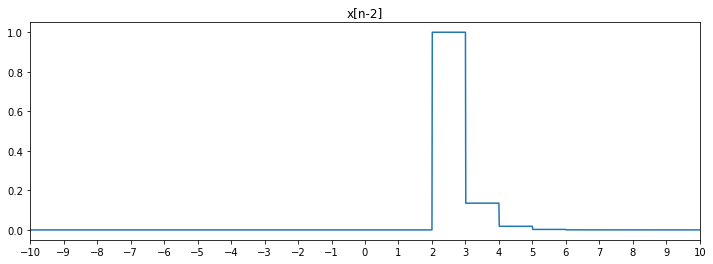

In [64]:
def step(x):
    return 1*(x>=0)

def step_func(x):
    n = math.floor(x)
    value = np.exp(-2*n)*step(n)
    return value

ts_step = np.arange(-10,10,1)
step1_signal = [step_func(n) for n in ts_step]

plt.figure(figsize=(12,4))
plt.xlim(-10,10)
plt.stem(ts_step,step1_signal)
plt.xticks(ts)
plt.title("x[n]")
plt.show()

ts_step = np.arange(-10,10,.01)
step2_signal = [step_func(n-2) for n in ts_step]

plt.figure(figsize=(12,4))
plt.xlim(-10,10)
plt.plot(ts_step,step2_signal)
plt.title("x[n-2]")
plt.xticks(ts)
plt.show()

3.Moving Average Filter Part II. We’re going to build on what you put together on the last worksheet. You’ll need your noisy square wave and your moving average filter from question 1. As we build our collection of filters we’ll want ways to characterize the filters so we can compare them. We’ll use the impulse response, step response, frequency response for now.

(a) Plot the impulse response of your moving average filter from question 1. You can do this with the following steps.

i. Write out your filter as a digital function, i.e. y[n]=... 

ii. Switch all your y’s to h’s and

iii. Switch all your x’s to δ’s.

iv. Now h[n] will be your impulse response.

y[n]=1/11(x[n]+x[n-1]+x[n-2]+x[n-3]+x[n-4]+x[n-5]+x[n-6]+x[n-7]+x[n-8]+x[n-9]+x[n-10])


h[n]=1/11(δ[n]+δ[n-1]+δ[n-2]+δ[n-3]+δ[n-4]+δ[n-5]+δ[n-6]+δ[n-7]+δ[n-8]+δ[n-9]+δ[n-10])

In [56]:
def impulse_response_func(x):
    h = (impulse(x)+impulse(x-1)+impulse(x-2)+impulse(x-3)+impulse(x-4)+impulse(x-5)
              +impulse(x-6)+impulse(x-7)+impulse(x-8))+impulse(x-9)+impulse(x-10)
    return h


def impulse_response(wave):
    i = 0
    filtered_wave = []
    
    while (i < (len(wave)-11)):        # loop ends before 11 before the end of the data set to account for nothing beyond the end    
        j = 0
        sum_1 = 0

        while (j < 11):
            sum_1 = sum_1 + wave[i + j]*impulse_response_func(j)    # summing 11 sequential points as it moves one point over
            j += 1                     
        filtered_wave.append(sum_1/11)   # divide the sum by 11 and save to a list
        i+= 1
    return filtered_wave

sq_wave_noisy_imp = impulse_response(sq_wave_noisy)  


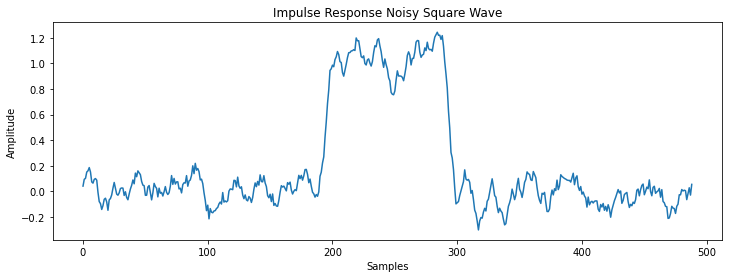

In [60]:
plt.figure(figsize=(12,4))
plt.plot(range(len(sq_wave_noisy_imp)),sq_wave_noisy_imp)
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.title("Impulse Response Noisy Square Wave")
plt.show()

(b) Plot the step response of your moving average filter from question 1. You can do this with the following steps.

i. Write out your filter as a digital function, i.e. y[n]=... 

ii. Switch all your y’s to s’s and

iii. Switch all your x’s to u’s.

iv. Now s[n] will be your step response.

s[n]=1/11(u[n]+u[n-1]+u[n-2]+u[n-3]+u[n-4]+u[n-5]+u[n-6]+u[n-7]+u[n-8]+u[n-9]+u[n-10])

In [66]:
def step_response_func(x):
    s = (step(x)+step(x-1)+step(x-2)+step(x-3)+step(x-4)+step(x-5)
              +step(x-6)+step(x-7)+step(x-8))+step(x-9)+step(x-10)
    return s


def impulse_response(wave):
    i = 0
    filtered_wave = []
    
    while (i < (len(wave)-11)):        # loop ends before 11 before the end of the data set to account for nothing beyond the end    
        j = 0
        sum_1 = 0

        while (j < 11):
            sum_1 = sum_1 + wave[i + j]*step_response_func(j)    # summing 11 sequential points as it moves one point over
            j += 1                     
        filtered_wave.append(sum_1/11)   # divide the sum by 11 and save to a list
        i+= 1
    return filtered_wave

sq_wave_noisy_step = impulse_response(sq_wave_noisy)  

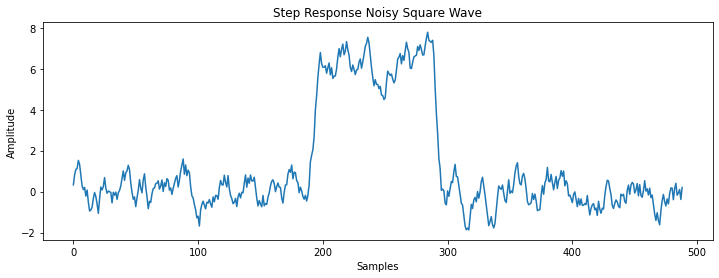

In [67]:
plt.figure(figsize=(12,4))
plt.plot(range(len(sq_wave_noisy_step)),sq_wave_noisy_step)
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.title("Step Response Noisy Square Wave")
plt.show()

(c) Plot the frequency response of your moving average filter form question 1 by applying an FFT to your impulse response. Use a logarithmic vertical scale.

4.Moving Average Filter Part III.

(a) Design a moving average filter that uses recursion to reduce the number of calculations per iteration.

In [69]:
def eleven_point_ave_recur(wave):
    i = 0
    j = 0
    sum = 0
    filtered_wave = []
    
    while (j < 11):
        sum = sum + wave[i + j]    # summing 11 sequential points as it moves one point over
        j += 1   
    filtered_wave.append(sum/11)
    i= 1   
   
    # loop to add the 11 point averages to a list
    while (i < (len(wave)-11)):        # loop ends before 11 before the end of the data set to account for nothing beyond the end    
        sum = filtered_wave[i-1]+(wave[i+10] - wave[i-1])/11          
        filtered_wave.append(sum)   # divide the sum by 11 and save to a list
        i+= 1
    return filtered_wave


(b) Apply it to your noisy square wave and make sure that you get the same result.

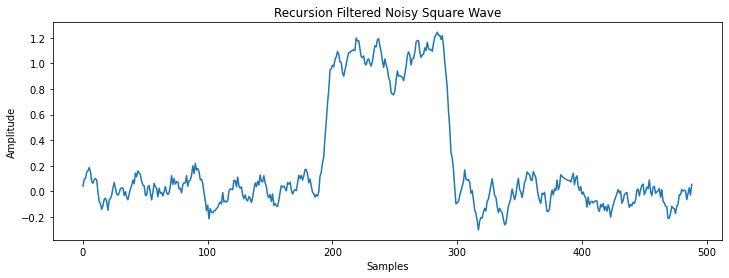

In [70]:
sq_wave_noisy_fltrd_recur= eleven_point_ave_recur(sq_wave_noisy)
plt.figure(figsize=(12,4))
plt.plot(range(len(sq_wave_noisy_fltrd_recur)),sq_wave_noisy_fltrd_recur)
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.title("Recursion Filtered Noisy Square Wave")
plt.show()